### Ejercicios Clase 8

In [1]:
import numpy as np # libreria básica operadores matemáticos y de arreglos
import matplotlib.pylab as plt # librería de graficación
#%matplotlib inline

#### 1. Realice una función en la cual se puedan observar la ROC causal, anticausal, bilateral y cuando no existe.

In [2]:
def roc_graph(r,typeroc='causal',r2=None,color='orange'):
    # r debe ser el radio menor o el radio de la parte causal en el caso bilateral
    # r2 debe ser el radio mayor (la parte anticausal)
    ang=np.arange(0.0,2*np.pi,0.01)
    xp=r*np.cos(ang)
    yp=r*np.sin(ang)
    %matplotlib inline
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111) 
    if typeroc=='causal':
        ax.plot(xp,yp) # Dibujar la grafica
        ax.set_facecolor(color)
        ax.fill(xp,yp,color='white')
        ax.set_title("ROC Causal",fontsize=18)
    elif typeroc=='anticausal':
        ax.plot(xp,yp) # Dibujar la grafica
        ax.fill(xp,yp,color=color)
        ax.set_title("ROC Anticausal",fontsize=18)
    elif typeroc=='bilateral':
        xp2=r2*np.cos(ang)
        yp2=r2*np.sin(ang)
        if(r>r2):
            print('¡La ROC del sistema no existe!')
            ax.set_facecolor(color)
            #ax.plot(xp,yp,color='black') # Dibujar la grafica
            ax.fill(xp,yp,color='white')
            #ax.plot(xp2,yp2,color='black') # Dibujar la grafica
            ax.fill(xp2,yp2,color=color)
            ax.set_title("No existe ROC",fontsize=18)
        elif (r==r2):
            print('El sistema solo converge en R= ',r)
            ax.plot(xp2,yp2,color=color) # Dibujar la grafica
            ax.set_title("ROC",fontsize=18)
        else:
            xp2=r2*np.cos(ang)
            yp2=r2*np.sin(ang)
            #ax.plot(xp2,yp2,color='black') # Dibujar la grafica
            ax.fill(xp2,yp2,color=color)
            #ax.plot(xp,yp,color='black') # Dibujar la grafica
            ax.fill(xp,yp,color='white')
            ax.set_title("ROC Bilateral",fontsize=18)
        ax.set_xlabel('Real',fontsize=18) # Etiqueta eje X
        ax.set_ylabel('Imaignario',fontsize=18) # Etiqueta eje Y
        plt.show() # Mostrar la grafica    
        

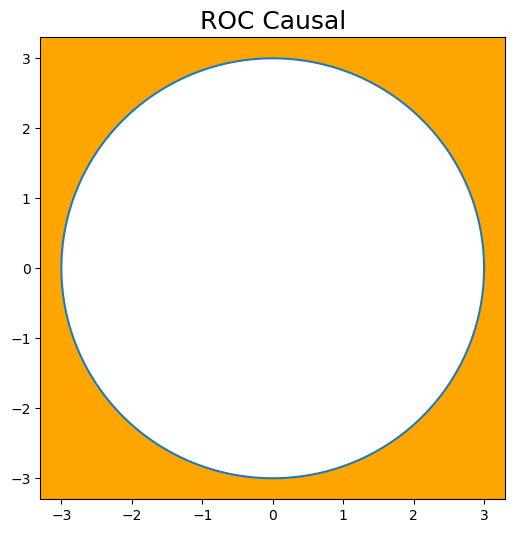

In [3]:
# ROC Causal
roc_graph(3,'causal')

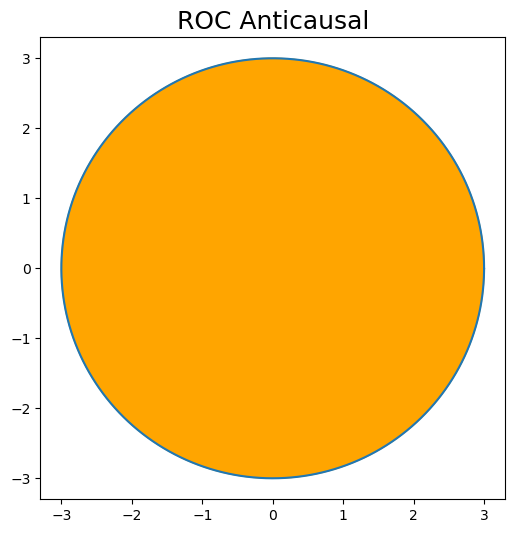

In [4]:
# ROC Anticausal
roc_graph(3,'anticausal')

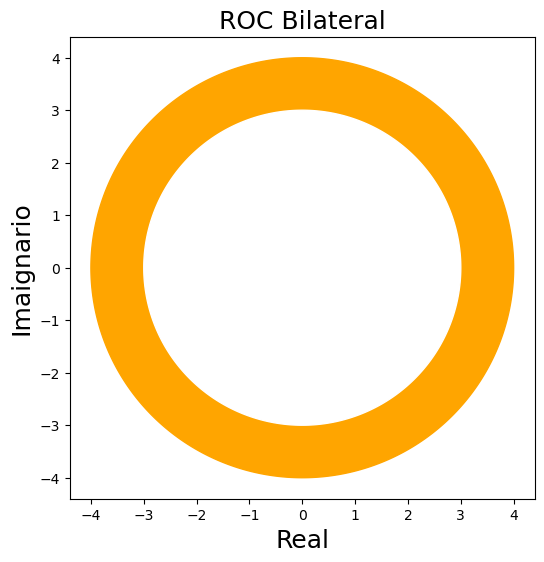

In [5]:
#ROC Bilateral
roc_graph(3,'bilateral',4)

¡La ROC del sistema no existe!


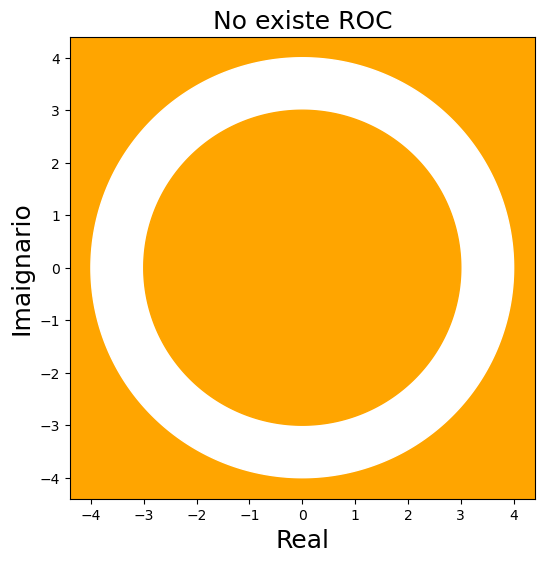

In [6]:
roc_graph(4,'bilateral',3)

El sistema solo converge en R=  3


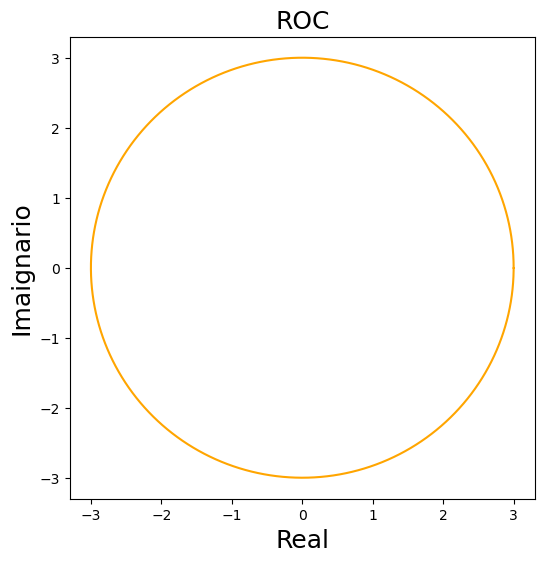

In [7]:
#Solo converge en R=3
roc_graph(3,'bilateral',3)

#### 2. Utlizando la librería scipy de Python. Graficar un diagrama de polos y ceros para una función de transferencia estable y otro para una función de transferencia inestable. ¿Que permite decir si una función de transferencia es estable o inestable?

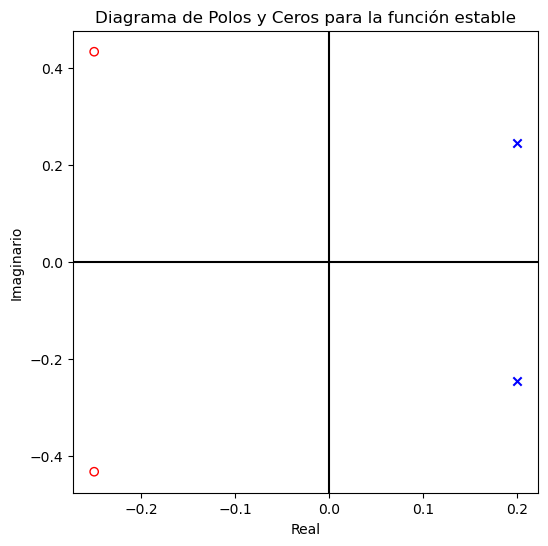

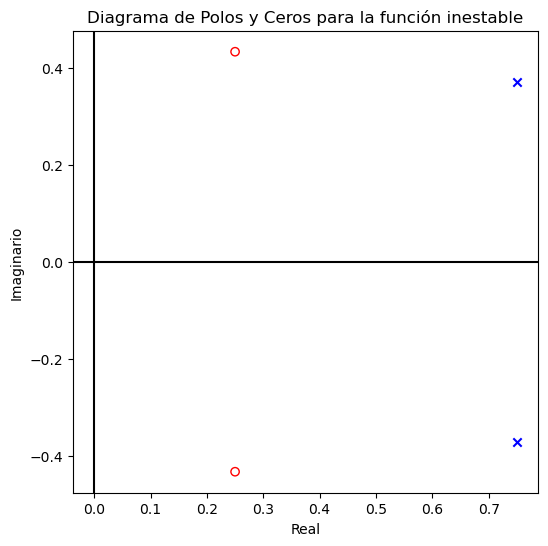

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Función de transferencia estable
num1 = [1, 0.5, 0.25]
den1 = [1, -0.4, 0.1]
z1, p1, k1 = signal.tf2zpk(num1, den1)

# Función de transferencia inestable
num2 = [1, -0.5, 0.25]
den2 = [1, -1.5, 0.7]
z2, p2, k2 = signal.tf2zpk(num2, den2)

# Graficar diagrama de polos y ceros para la función de transferencia estable
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z1), np.imag(z1), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p1), np.imag(p1), marker='x', color='b')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel('Real')
plt.ylabel('Imaginario')
plt.title('Diagrama de Polos y Ceros para la función estable')
plt.show()

# Graficar diagrama de polos y ceros para la función de transferencia inestable
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z2), np.imag(z2), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p2), np.imag(p2), marker='x', color='b')
plt.axvline(0, color='k')
plt.axhline(0, color='k')
plt.xlabel('Real')
plt.ylabel('Imaginario')
plt.title('Diagrama de Polos y Ceros para la función inestable')
plt.show()


Comentario: En la función de transferencia estable, todos los polos y ceros están dentro del círculo unitario, mientras que en la función de transferencia inestable, hay al menos un polo fuera del círculo unitario, lo que indica inestabilidad.